---
title: Palmer Penguins Classification
author: Evan Flaks
date: '2024-02-18'
image: "penguins.jpeg"
description: "Machine Learning model to predict penguin species"
format: html
---

# Abstract

This goal of this project was to develop a machine learning model to classify penguin species based on quantitative and qualititave characteristics using the Palmer Penguins dataset. After accessing the data and splitting it up into training and testing sets, I created visualizations on the training data to better understand which species exhibited particular traits. Then, I used a feature selection system to determine which features (two quantitative and one qualitiative) would be the best predictor of a penguin's species. From there, I used these features to train a logistic regression model. The model's performance is assessed using training and test accuracy and decision region visualizations. The goal of this assignment was to take a penguin with unknown species, analyze three of its given features, and with 100% accuracy, predict its species. 

# Data Preparation

First I must access and read the data from the source.

In [1]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

Now, I must prepare the dataset for machine learning by encoding the target variable (Species) into numerical values, dropping unnecessary columns, removing missing values and invalid entries, converting categorical columns into numerical representations via one-hot encoding, and splitting up training and testing sets.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder for the target variable
le = LabelEncoder()
le.fit(train["Species"])

# Function to preprocess data
def prepare_data(df):
    df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis=1)
    df = df[df["Sex"] != "."]  # Remove rows with invalid 'Sex' values
    df = df.dropna()  # Remove any remaining missing values
    y = le.transform(df["Species"])  # Encode the target variable
    df = df.drop(["Species"], axis=1)  # Remove the target column from features
    df = pd.get_dummies(df)  # One-hot encode categorical features
    return df, y

# Prepare the dataset
X, y = prepare_data(train)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert training data back into a DataFrame for visualization purposes
train_data = X_train.copy()
train_data["Species"] = le.inverse_transform(y_train)  # Convert encoded labels back to species names

# Reconstruct the 'Island' column from one-hot encoded values
island_columns = ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
train_data["Island"] = train_data[island_columns].idxmax(axis=1).str.replace("Island_", "")

# Check the sizes of the splits
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")


Training Set Size: 204
Test Set Size: 52


# Visualizations

Now, to visualize the dataset, I have created a scatter plot that plots flipper length vs. body mass of the three species and a bar chart showing the distribution of Penguins found on the three different islands. Finally, I created a summary table that shows each species' average Culmen Length and Culmen Depth.

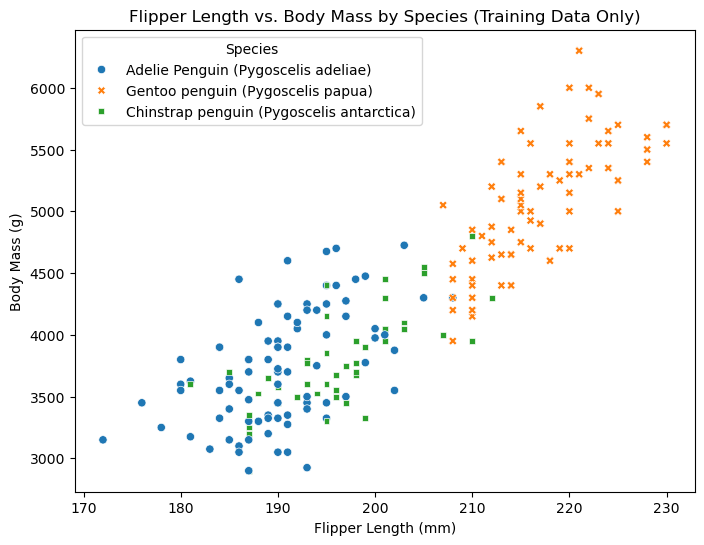

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='Flipper Length (mm)', y='Body Mass (g)', hue='Species', style='Species')

# Labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Flipper Length vs. Body Mass by Species (Training Data Only)')
plt.legend(title='Species')
plt.show()


Above, I have created a scatter plot that plots the flipper length and body mass of each penguin observed in the training set. I created a key with different symbols to plot each species so I could visualize the physical differences between each species. This visualization gave me valuable insight, informing me that Gentoo penguins are much larger in terms of body mass and flipper length than both Adelie and Chinstrap penguins. Adelie and Chinstrap penguins, as represented by the blue circles and green squares, share very similar sizes in these metrics. From this, we can conclude that body mass and flipper length would be excellent features with which to train our model in order to distinguish between Gentoo or not-gentoo, but these features would not help our model distinguish between Adelie and Chinstrap.

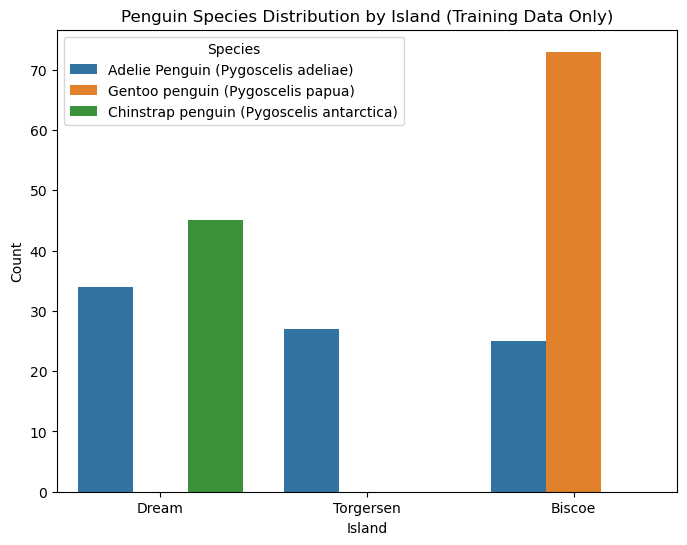

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for species distribution by island (training data only)
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Island', hue='Species')

# Labels and title
plt.xlabel('Island')
plt.ylabel('Count')
plt.title('Penguin Species Distribution by Island (Training Data Only)')
plt.legend(title='Species')
plt.show()


For this visualization, I created a bar chart to see the island where each observed penguin was found. Here, we can see that Gentoo penguins are only found on Biscoe Island and Chinstrap penguins are only found on Dream Island. Adelie penguins, on the other hand, are found on all three islands. This bar chart tells me that Island location could help train my model to distinguish between Adelie and Chinstrap because Chinstrap penguins seem to only be found on Dream Island. So, if we see a penguin with quantitaive measurables that could fall under Adelie or Chinstrap, but the penguin was found on Torgersen Island, the model would correctly predict that the penguin is Adelie. This is especially helpful considering the quantitative features observed in my first visualization had a lot of overlap between Adelie and Chinstrap.

In [5]:
import pandas as pd

# Compute the average Culmen Length & Depth in the training set only
summary_table = train_data.groupby("Species")[["Culmen Length (mm)", "Culmen Depth (mm)"]].mean()

# Display the summary table
print(summary_table)



                                           Culmen Length (mm)  \
Species                                                         
Adelie Penguin (Pygoscelis adeliae)                 39.048837   
Chinstrap penguin (Pygoscelis antarctica)           48.697778   
Gentoo penguin (Pygoscelis papua)                   47.031507   

                                           Culmen Depth (mm)  
Species                                                       
Adelie Penguin (Pygoscelis adeliae)                18.412791  
Chinstrap penguin (Pygoscelis antarctica)          18.406667  
Gentoo penguin (Pygoscelis papua)                  14.957534  


Here, I created a table to see the average culmen length and culmen depth of each penguin species from the data set. From this, we can see that culmen length would be a great feature to distinguish Adelie penguins from the other two species because they have considerably shorter culmens. However, culmen length would not be very helpful in distinguishing Gentoo from Chinstrap because they have very similar measurements. As for culmen depth, we see that Adelie and Chinstrap have very similar average measurements while Gentoo penguins have considerably smaller culmen depths. This means culmen depth would be a good feature for my model to distinguish Gentoo penguins from the other two species. 

# Data Visualization Conclusions

After creating three data visualizations, I have intuition for some of the features that would help train a successful model. From my scatter plot, I saw that body mass and flipper length would both be great features to help my model distinguish between Gentoo and Adelie or Chinstrap, but would not be very helpful in distinguishing Adelie from Chinstrap. Then, from the summary table, we could see that Adelie penguins, on average, have around a 20% shorter culmen length than Chinstrap penguins, so that would be a great feature to help my model distinguish between those two species. Finally, since Chinstrap penguins were only found on Dream Island and Gentoo Penguins were only found on Biscoe Island as represented by my bar chart, I figured this would be a nice qualitative feature with which to train my model. 


# Feature Selection

Now we must choose which three features we want to use to predict the penguin species. I gained some valuable insight from my visualizations but now want to use a systematic approach to select the three best features. To do this, I used a Random Forest Classifier by measuring how much each feature contributes to making accurate predictions. When splitting a node in a decision tree, features that provide better separation between classes are preferred. The model tracks how often a feature is used in important splits and how much it improves classification accuracy. The importance of each feature is calculated as the total reduction in prediction error (impurity) it provides across all trees. Features with higher scores contribute more to the model’s decision-making.

In [17]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Train a random forest to assess feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                     Feature  Importance
0         Culmen Length (mm)    0.234636
2        Flipper Length (mm)    0.179364
5          Delta 13 C (o/oo)    0.161621
1          Culmen Depth (mm)    0.148071
4          Delta 15 N (o/oo)    0.075136
7               Island_Dream    0.063007
6              Island_Biscoe    0.059049
3              Body Mass (g)    0.058736
8           Island_Torgersen    0.012969
10      Clutch Completion_No    0.002622
12                Sex_FEMALE    0.002250
13                  Sex_MALE    0.001822
11     Clutch Completion_Yes    0.000717
9   Stage_Adult, 1 Egg Stage    0.000000



From this, we can conclude that the best qualitative category is Island and the best quantitative categories are Culmen Length and Flipper Length. So, these are the features we will train our model on.

# Logistic Regression Model Testing

The model below uses logistic regression to classify data based on  flipper length, culmen length, and island. First, it standardizes the numerical features using StandardScaler() to ensure consistent scaling. Then, it trains a logistic regression model with increased iterations (1000) to ensure convergence. Finally, it evaluates performance using training and test accuracy, helping assess how well the model generalizes.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define selected features
cols = ['Flipper Length (mm)', 'Culmen Length (mm)','Island_Biscoe', 'Island_Dream', 'Island_Torgersen',]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[cols]), columns=cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[cols]), columns=cols)


# Initialize and train logistic regression with increased iterations
LR = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
LR.fit(X_train_scaled, y_train)

# Evaluate model
print("Training Accuracy:", LR.score(X_train_scaled, y_train))
print("Test Accuracy:", LR.score(X_test_scaled, y_test))




Training Accuracy: 0.9754901960784313
Test Accuracy: 1.0


# Plotting Decision Regions

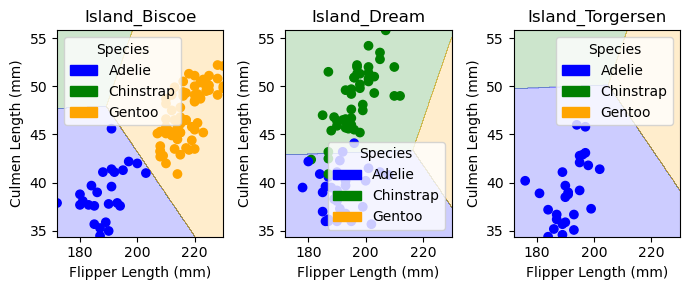

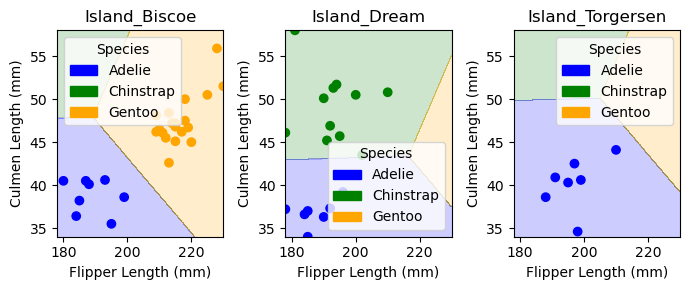

In [19]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

def plot_regions(model, X, y, scaler):
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]

    fig, axarr = plt.subplots(1, len(qual_features), figsize=(7, 3))

    # Create a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
        XY = pd.DataFrame({X.columns[0]: XX, X.columns[1]: YY})

        # Initialize categorical features as zeros
        for j in qual_features:
            XY[j] = 0

        # Set the specific category feature to 1
        XY[qual_features[i]] = 1

        # Standardize XY to match model input
        XY_scaled = pd.DataFrame(scaler.transform(XY), columns=X.columns)

        # Predict decision boundary
        p = model.predict(XY_scaled)
        p = p.reshape(xx.shape)

        # Use contour plot to visualize the predictions
        decision_cmap = ListedColormap(["blue", "green", "orange"])  # Match species colors
        axarr[i].contourf(xx, yy, p, cmap=decision_cmap, alpha=0.2, vmin=0, vmax=2)

        ix = X[qual_features[i]] == 1

        # Plot the actual training data points
        species_cmap = ListedColormap(["blue", "green", "orange"])  # blue = Adelie, Green = Chinstrap, orange = Gentoo
        axarr[i].scatter(x0[ix], x1[ix], c=y[ix], cmap=species_cmap, vmin=0, vmax=2)

        axarr[i].set(
            xlabel=X.columns[0],
            ylabel=X.columns[1],
            title=qual_features[i]
        )

        patches = []
        for color, spec in zip(["blue", "green", "orange"], ["Adelie", "Chinstrap", "Gentoo"]):
            patches.append(Patch(color=color, label=spec))

        axarr[i].legend(handles=patches, title="Species", loc="best")

    plt.tight_layout()

# Call the function with scaler applied
plot_regions(LR, X_train[cols], y_train, scaler)
plot_regions(LR, X_test[cols], y_test, scaler)



Above, I have plotted my model's decision regions on both the training and test sets, showing the thresholds of prediction for each species split up by each island. 

For both the training and test set of penguins on Torgersen Island, my model predicted with 100% success as there were no other penguin found on this island besides Adelies. 

Dream Island contained both Adelie and Chinstrap penguins, which both have very similar flipper length, so the decision regions for that island are based almost entirely by culmen length, as can be seen by the near-horizontal divide between the green and blue regions. My model did have some error on the training set for Dream Island as there were some outliers of the decision regions -- Chinstraps with below average culmen lengths and Adelies with above average culmen lengths. The test set did not have as many outliers and therefore still predicted with 100% accuracy on Dream Island.

As for Biscoe Island, there were both Gentoo and Adelie penguins. As observed in my data visualizations, Gentoo penguins are considerably larger than Adelie in both flipper length and culmen length so the regions are divided diagonally. There were no overlaps in the decision regions on Biscoe in either the test or training set. 

It is interesting to me that even though no Gentoo or Chinstrap penguins were found on Torgersen in the entire data set, there are still orange and green regions. Similarly, no Gentoos are found on Dream or Torgerson, but my model still has an orange decision region for both of those islands. This makes sense to me because, for instance, if the model found a penguin with a 230 mm flipper length and 60 mm culmen depth on Torgersen, it would be a reasonable prediction for that penguin to be a Gentoo, even if there are no other Gentoos on the island. 

# Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

y_test_pred = LR.predict(X_test_scaled)
C = confusion_matrix(y_test, y_test_pred)
C

array([[22,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 19]])

Above is my models confusion matrix for the test set. The rows represent the actual species of a penguin while the columns represent the predicted species. As we can see, my model predicted all 22 Adelies to be Adelie, all 11 Chinstraps to be Chinstraps, and all 19 Gentoos to be gentoos. Therefore, my model correctly predicted the species of all 52 penguins in the test set with no errors.

# Discussion

Throughout this project, I gained valuable insights into the entire machine learning process. First, it was essential to prepare the data into training and test sections, encode qualitative regions into quantitave values, drop unessecary columns, and simplify column names. Then, the data visualizations helped me uncover trends in the dataset. This allowed me to get a foundational understanding of the variance between the species' characteristics. A key takeaway was the importance of feature selection. I initially just analyzed my data visualizations and chose features I thought would be strong predictors. Even though this was somewhat accurate, when I automated my feature selection with a RandomForestClassifier and chose the most statistically important feautures, I was able to bring my model's prediction success up to 100% for the test set. I also gained experience with model selection and scaling. After trying out a few options, I chose the Logistic Regression model because it was consistently high performing. During this process, I also realized that I had to standardize the numerical features to ensure consistent scaling. Perhaps the most interesting discovery of the entire process was plotting the decision regions to see where my model numerically distinguished between the species' and to see the entire regions where a particular species would fall. 